### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./SQUAREPHARMA.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume
0,0,SQUAREPHARMA,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246
1,1,SQUAREPHARMA,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309
2,2,SQUAREPHARMA,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452
3,3,SQUAREPHARMA,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797
4,4,SQUAREPHARMA,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume
1253,1253,SQUAREPHARMA,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125
1254,1254,SQUAREPHARMA,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385
1255,1255,SQUAREPHARMA,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215
1256,1256,SQUAREPHARMA,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211
1257,1257,SQUAREPHARMA,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754


In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

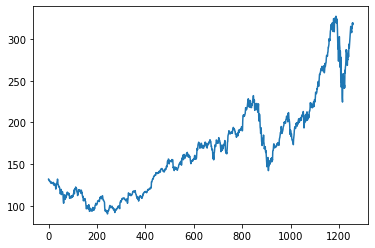

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 441)

In [15]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 391ms/step - loss: 0.0171 - val_loss: 0.0670
Epoch 2/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 3s 217ms/step - loss: 9.8797e-04 - val_loss: 0.0051
Epoch 4/100
12/12 [==============================] - 3s 220ms/step - loss: 8.1810e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 3s 215ms/step - loss: 6.7042e-04 - val_loss: 0.0043
Epoch 6/100
12/12 [==============================] - 3s 221ms/step - loss: 6.5759e-04 - val_loss: 0.0045
Epoch 7/100
12/12 [==============================] - 2s 211ms/step - loss: 6.0262e-04 - val_loss: 0.0040
Epoch 8/100
12/12 [==============================] - 2s 202ms/step - loss: 5.9584e-04 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 3s 224ms/step - loss: 5.9197e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 3s 243ms

12/12 [==============================] - 3s 277ms/step - loss: 1.8697e-04 - val_loss: 0.0014
Epoch 79/100
12/12 [==============================] - 3s 275ms/step - loss: 1.8334e-04 - val_loss: 0.0010
Epoch 80/100
12/12 [==============================] - 3s 253ms/step - loss: 1.6946e-04 - val_loss: 0.0010
Epoch 81/100
12/12 [==============================] - 3s 269ms/step - loss: 1.8068e-04 - val_loss: 9.8273e-04
Epoch 82/100
12/12 [==============================] - 3s 223ms/step - loss: 1.7818e-04 - val_loss: 9.9184e-04
Epoch 83/100
12/12 [==============================] - 3s 220ms/step - loss: 1.6098e-04 - val_loss: 9.5204e-04
Epoch 84/100
12/12 [==============================] - 3s 274ms/step - loss: 1.6851e-04 - val_loss: 0.0012
Epoch 85/100
12/12 [==============================] - 3s 276ms/step - loss: 1.8694e-04 - val_loss: 9.3335e-04
Epoch 86/100
12/12 [==============================] - 3s 213ms/step - loss: 1.7578e-04 - val_loss: 0.0014
Epoch 87/100
12/12 [=======================

In [28]:
import tensorflow as tf

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.54338174424853

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

238.93709794664855

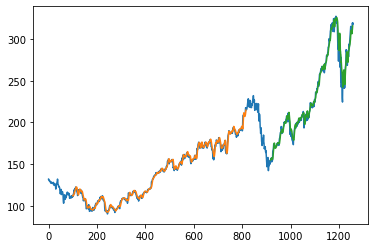

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

441

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
print(temp_input)

[1.0000000000000002, 0.9901629654648318, 0.9905007177235499, 0.9653803934813816, 0.9848855864223593, 0.9708688676855528, 0.9402600692392133, 0.8774803681499621, 0.8348391454867856, 0.8541332432660644, 0.7733682344000676, 0.7726927298826314, 0.8801401671873683, 0.8400743054969182, 0.8967322468969012, 0.8552731571392387, 0.8388499535590646, 0.7423372456303303, 0.8232711306256861, 0.7814320695769654, 0.6665963016127672, 0.7921557037912694, 0.6411804441442204, 0.6861437135860848, 0.6600101325677616, 0.6520307354555435, 0.5864223591995272, 0.5658616904500551, 0.660896732246897, 0.6551549438486872, 0.7097019336316812, 0.664527569028118, 0.6943764248923416, 0.692181035210673, 0.6356919699400492, 0.6526640209406402, 0.637802921557038, 0.7267162036646122, 0.7138816178333194, 0.7419150553069325, 0.7500211095161702, 0.7722283205268936, 0.8304905851557884, 0.8194291986827664, 0.8289706999915563, 0.8125474964113824, 0.7877649244279323, 0.7516254327450818, 0.7842607447437306, 0.7797433082833742, 0.8

In [50]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.96197861 0.96170169
 0.96034384 0.95941323 0.95950675 0.96074277 0.96298301 0.96594971
 0.96931207 0.97276324 0.97607124 0.97910452 0.98182899 0.9842878
 0.9865694  0.98877698 0.99100137 0.99330676 0.99572259 0.9982481
 1.00085974 1.00352156 1.00619519 1.00884843 1.01145947 1.01401699
 1.0165205  1.01897669 1.02139473 1.02378511 1.02615571 1.02851152
 1.03085363 1.03318095 1.03549063 1.03777897 1.0400418  1.04227781
 1.04448545 1.04666412 1.04881513 1.05093908 1.053038   1.05511284
 1.05716407 1.05919254 1.06119871 1.0631814  1.06514204 1.06707919
 1.06899345 1.07088494 1.07275307 1.07459843 1.07642114 1.07822156
 1.08000016 1.08175659 1.08349109 1.08520448 1.08689582 1.08856618
 1.09021521 1.09184337 1.09345055 1.09503686 1.09660268 1.09814739
 1.09967172 1.10117626 1.10266018 1.10412443 1.10556889 1.10699403
 1.10839927 1.1097852  1.11115217 1.11250007 1.113829

8 day output [[1.136734]]
9 day input [0.96491598 0.96197861 0.96170169 0.96034384 0.95941323 0.95950675
 0.96074277 0.96298301 0.96594971 0.96931207 0.97276324 0.97607124
 0.97910452 0.98182899 0.9842878  0.9865694  0.98877698 0.99100137
 0.99330676 0.99572259 0.9982481  1.00085974 1.00352156 1.00619519
 1.00884843 1.01145947 1.01401699 1.0165205  1.01897669 1.02139473
 1.02378511 1.02615571 1.02851152 1.03085363 1.03318095 1.03549063
 1.03777897 1.0400418  1.04227781 1.04448545 1.04666412 1.04881513
 1.05093908 1.053038   1.05511284 1.05716407 1.05919254 1.06119871
 1.0631814  1.06514204 1.06707919 1.06899345 1.07088494 1.07275307
 1.07459843 1.07642114 1.07822156 1.08000016 1.08175659 1.08349109
 1.08520448 1.08689582 1.08856618 1.09021521 1.09184337 1.09345055
 1.09503686 1.09660268 1.09814739 1.09967172 1.10117626 1.10266018
 1.10412443 1.10556889 1.10699403 1.10839927 1.1097852  1.11115217
 1.11250007 1.11382937 1.11513984 1.11643207 1.1177057  1.11896157
 1.12019908 1.12141907 1

17 day output [[1.1449898]]
18 day input [0.96931207 0.97276324 0.97607124 0.97910452 0.98182899 0.9842878
 0.9865694  0.98877698 0.99100137 0.99330676 0.99572259 0.9982481
 1.00085974 1.00352156 1.00619519 1.00884843 1.01145947 1.01401699
 1.0165205  1.01897669 1.02139473 1.02378511 1.02615571 1.02851152
 1.03085363 1.03318095 1.03549063 1.03777897 1.0400418  1.04227781
 1.04448545 1.04666412 1.04881513 1.05093908 1.053038   1.05511284
 1.05716407 1.05919254 1.06119871 1.0631814  1.06514204 1.06707919
 1.06899345 1.07088494 1.07275307 1.07459843 1.07642114 1.07822156
 1.08000016 1.08175659 1.08349109 1.08520448 1.08689582 1.08856618
 1.09021521 1.09184337 1.09345055 1.09503686 1.09660268 1.09814739
 1.09967172 1.10117626 1.10266018 1.10412443 1.10556889 1.10699403
 1.10839927 1.1097852  1.11115217 1.11250007 1.11382937 1.11513984
 1.11643207 1.1177057  1.11896157 1.12019908 1.12141907 1.12262154
 1.1238066  1.12497425 1.12612522 1.1272589  1.12837601 1.1294769
 1.13056111 1.13162911 1

26 day output [[1.1521541]]
27 day input [0.99330676 0.99572259 0.9982481  1.00085974 1.00352156 1.00619519
 1.00884843 1.01145947 1.01401699 1.0165205  1.01897669 1.02139473
 1.02378511 1.02615571 1.02851152 1.03085363 1.03318095 1.03549063
 1.03777897 1.0400418  1.04227781 1.04448545 1.04666412 1.04881513
 1.05093908 1.053038   1.05511284 1.05716407 1.05919254 1.06119871
 1.0631814  1.06514204 1.06707919 1.06899345 1.07088494 1.07275307
 1.07459843 1.07642114 1.07822156 1.08000016 1.08175659 1.08349109
 1.08520448 1.08689582 1.08856618 1.09021521 1.09184337 1.09345055
 1.09503686 1.09660268 1.09814739 1.09967172 1.10117626 1.10266018
 1.10412443 1.10556889 1.10699403 1.10839927 1.1097852  1.11115217
 1.11250007 1.11382937 1.11513984 1.11643207 1.1177057  1.11896157
 1.12019908 1.12141907 1.12262154 1.1238066  1.12497425 1.12612522
 1.1272589  1.12837601 1.1294769  1.13056111 1.13162911 1.13268149
 1.13371766 1.13473856 1.13574409 1.13673401 1.13770914 1.13866937
 1.13961506 1.1405460

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

1258

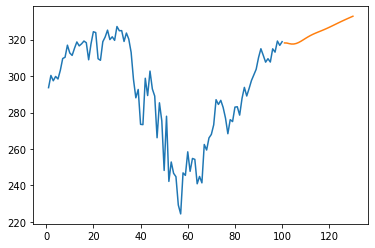

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

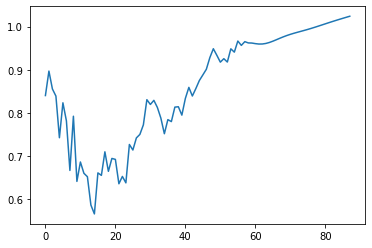

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

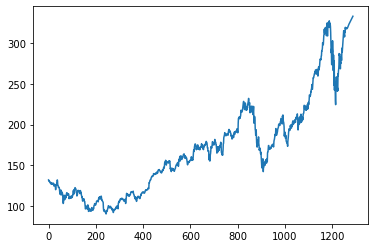

In [46]:
plt.plot(df3)